## Prediction using linear regression

### Simple linear regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Generate a random data
np.random.seed(0)

# area is a independent variable
area = 2.5 * np.random.randn(100) + 25
# price is a dependent variable
price = 25 * area + 5 + np.random.randint(20, 50, size=len(area))

data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area', 'price'])

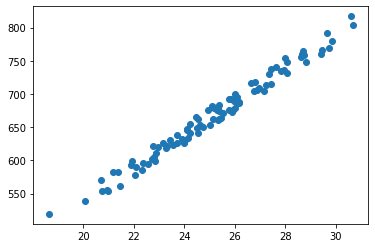

In [3]:
plt.scatter(data['area'], data['price'])
plt.show()

Now, we calculate the two regression coefficients using the equations we defined

$$W=\frac {\sum_{i=1}^N Y_i(A_i - \bar A)} {\sum_{i=1}^N (A_i - \bar A)^2}, 
\;\;b=\frac{1}{N} \sum_{i=1}^N Y_i - \frac{W}{N} \sum_{i=1}^N A_i$$

In [4]:
W = sum(price * (area - np.mean(area))) / sum((area - np.mean(area)) ** 2)
b = np.mean(price) - W*np.mean(area)
print('The regression coefficients are', W, b)

The regression coefficients are 24.815544052284988 43.4989785533412


In [5]:
# try predicting the new prices using the obtained weight and bias values
y_pred = W * area + b

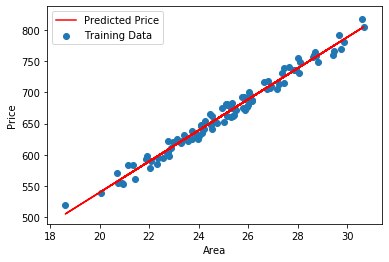

In [6]:
plt.plot(area, y_pred, color='red', label='Predicted Price')
plt.scatter(data['area'], data['price'], label='Training Data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()

## TensorFlow Estimators

TensorFlow provides Estimators as higher-level APIs, to provide scalable and production-oriented solutions.  
TensorFlow provides two types of Estimators:

- Canned Estimators: These are premade Estimators available in the TensorFlow estimator module.
- Custom Estimators: Users can also create their own estimators from the models they build in TensorFlow Keras. These are user-defined Estimators.

Before being able to use TensorFlow Estimator let us understand two important components of the Estimator pipeline:

### Feature columns

The **`feature_column`** module of TensorFlow 2.0 acts as a bridge between your input data and the model. The input parameters to be used by the estimators for training are passed as feature columns. They are defined in TensorFlow **`feature_column`** and specify how the data is interpreted by the model. To create feature columns we will need to call functions from **`tensorflow.feature_columns`**. There are nine functions available in the feature column:

- **`categorical_column_with_identity`**: Here each category is one-hot encoded, and thus has a unique identity. This can be used for numeric values only.
- **`categorical_column_with_vocabulary_file`**: This is used when the categorical input is a string and the categories are given in a file. The string is first converted to a numeric value and them one-hot encoded.
- **`categorical_column_with_vocabulary_list`**: This is used when the categorical input is a string and the categories are explicitly define in a list. The string is first converted to a numeric value and then one-hot encoded.
- **`categorical_column_with_hash_bucket`**: In case the number of categories is very large, and it is not possible to one-hot encode, we use hasing.
- **`crossed_column`**: When we want to use two columns combined as one feature, for example, in the case of geolocation-based data it makes sense to combine longitude and latitude values as one feature.
- **`numeric_column`**: Used when the feature is a numeric, it can be a single value or even a matrix.
- **`indicator_column`**: We do not use this directly. Instead, it is used with the categorical column, but only when the number of categories is limited and can be represented as one-hot encoded.
- **`embedding_column`**: We do not use this directly. Instead, it is used with the categorical column, but only when the number of categories is very large and cannot be represented as one-hot encoded.
- **`bucketized_column`**: This is used when, instead of a specific numeric value, we split the data into different categories depending upon its value.

### Input functions

The data for training, evaluattion, as well as prediction, needs to be made available through an input function. The input function returns a **`tf.data.Dataset`** object; the object returns a tuple containing features and labels.

### MNIST using TensorFlow Estimator API

Let us build a simple TensorFlow estimator with a simple dataset for a multiple regression problem.

1. Since our dataset contains both numeric and categorical data, we need the functions to process both types of data

In [7]:
import tensorflow as tf
from tensorflow import feature_column as fc

numeric_column = fc.numeric_column
categorical_column_with_vocabulary_list = fc.categorical_column_with_vocabulary_list

2. Now, we define the feature columns we will be using to train the regressor.

In [9]:
featcols = [
    tf.feature_column.numeric_column('area'),
    tf.feature_column.categorical_column_with_vocabulary_list('type', ['bungalow', 'apartment'])
]

3. We define an input function to provide input for training. The function returns a tuple containing features and labels:

In [10]:
def train_input_fn():
    features = {'area': [1000, 2000, 4000, 1000, 2000, 4000],
                'type': ['bungalow','bungalow','house','apartment','apartment','apartment']}
    labels = [500, 1000, 1500, 700, 1300, 1900]
    return features, labels

4. Next, we use the premade **`LinearRegressor`** estimator and fit it on the training dataset:

In [11]:
model = tf.estimator.LinearRegressor(featcols)
model.train(train_input_fn, steps=200)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\polas\\AppData\\Local\\Temp\\tmpcdyl8s0o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I

5. Now that the estimator is trained, let us see the result of the prediction:

In [12]:
def predict_input_fn():
    features = {'area':[1500, 1800], 'type':['house','apt']}
    return features

predictions = model.predict(predict_input_fn)
print(next(predictions))
print(next(predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\polas\AppData\Local\Temp\tmpcdyl8s0o\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([692.7829], dtype=float32)}
{'predictions': array([830.9035], dtype=float32)}


## Prediction house price using linear regression

Now that we have the basic covered, let us apply these concepts to a real dataset. We will consider the Boston housing price dataset collected by Harrison and Rubinfield in 1978. The dataset contains 506 sample cases. Each house is assigned 14 attributes

prediction value : MEDV - median value of owner-occupied homes in $1,000s

1. Import the nodules required

In [14]:
import tensorflow as tf
import pandas as pd
from tensorflow import feature_column as fc
from tensorflow.keras.datasets import boston_housing

2. Download the dataset

In [15]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


3. Now let us define the features in our data

In [19]:
features = [ 'CRIM' , 'ZN' ,'INDUS' , 'CHAS' , 'NOX' , 'RM' , 'AGE' , 'DIS' , 'RAD' , 'TAX' , 'PTRATIO' , 'B' , 'LSTAT' ]
x_train_df = pd.DataFrame(x_train, columns=features)
x_test_df = pd.DataFrame(x_test, columns=features)
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])
x_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


4. At present we are taking all the features

In [20]:
feature_columns = []
for feature_name in features:
    feature_columns.append(fc.numeric_column(feature_name, dtype=tf.float32))

5. We create the input function for the estimator. The function returns the **`tf.Data.Dataset`** object with a tuple: features and labels in batches.

In [24]:
def estimator_input_fn(df_data, df_label, epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
        if shuffle:
            ds = ds.shuffle(100)
        ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_function

train_input_fn = estimator_input_fn(x_train_df, y_train_df)
val_input_fn = estimator_input_fn(x_test_df, y_test_df, epochs=1, shuffle=False)

In [22]:
type(train_input_fn)

function

6. Next we instantiate a LinearRegressor estimator

In [25]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)
linear_est.train(train_input_fn, steps=100)
result = linear_est.evaluate(val_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\polas\\AppData\\Local\\Temp\\tmpl5nga70k', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, y

7. Let's make a prediction on it

In [26]:
result = linear_est.predict(val_input_fn)
for pred, exp in zip(result, y_test[:32]):
    print('Predicted Value: ', pred['predictions'][0], 'Expected: ', exp)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\polas\AppData\Local\Temp\tmpl5nga70k\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicted Value:  2.3082397 Expected:  7.2
Predicted Value:  21.233168 Expected:  18.8
Predicted Value:  20.348001 Expected:  19.0
Predicted Value:  20.66255 Expected:  27.0
Predicted Value:  20.840532 Expected: 

To get TensorBoard graph for the estimator, you just need to define **`model_dir`** while instantiating the Estimator class:

In [ ]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns, model_dir='logs/func/')

## Logistic regression on the MNIST dataset

MNIST (Modified National Institute of Standards and Techonlogy)

1. The first step is importing the modules needed

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2. We take the input data of MNIST from **`tensorflow.keras`** dataset

In [2]:
# Load training and eval data
((train_data, train_labels), (eval_data, eval_labels)) = tf.keras.datasets.mnist.load_data()

3. Next, we preprocess the data

In [3]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)
eval_data = eval_data/np.float32(255)
eval_labels = eval_labels.astype(np.int32)

4. Use the **`feature_column`** module of TensorFlow to define numeric features of size 28x28

In [4]:
feature_columns = [tf.feature_column.numeric_column('x', shape=[28, 28])]

5. Create the logistic regression estimator. We use a simple **`LinearClassifier`**.

In [5]:
classifier = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=10, model_dir = 'mnist_model/')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'mnist_model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


6. Let us also build an **`input_function`** to feed the estimator

In [7]:
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x':train_data}, y=train_labels, batch_size=100, num_epochs=None, shuffle=True)

7. Let's now trian the classifier:

In [8]:
classifier.train(input_fn = train_input_fn, steps=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into mnist_model/model.ckpt.
INFO:tensorflow:loss 

8. Next, we create the input function for validation data:

In [9]:
val_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x':eval_data}, y=eval_labels, num_epochs=1, shuffle=False)

9. Let us evaluate the trained Linear Classifier on the validation data

In [10]:
eval_results = classifier.evaluate(input_fn=val_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-07T06:27:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from mnist_model/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.40136s
INFO:tensorflow:Finished evaluation at 2020-05-07-06:27:12
INFO:tensorflow:Saving dict for global step 10: accuracy = 0.7779, average_loss = 0.7988499, global_step = 10, loss = 0.7989811
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10: mnist_model/model.ckpt-10
{'accuracy': 0.7779, 'average_loss': 0.7988499, 'loss': 0.7989811, 'global_step': 10}
